## **Series de tiempo**

*Parte 2*

En esta segunda parte ya instanciaremos nuestro primer modelo predictivo de series de tiempo. Este notebook aplicará un modelo ARIMA.

Utilizaremos un dataset de ventas mensuales de champagne entre 1964 y 1972. [Aquí](https://www.kaggle.com/datasets/anupamshah/perrin-freres-monthly-champagne-sales) podrán encontrarlo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
data = pd.read_csv(r'.\Datasets\Clase_04_champagne.csv')

In [3]:
data.head(3)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0


## **ARIMA**

Autoregresivo (AR) integrada (I) media móvil (MA) corresponde a uno de los modelos clásicos más empleados. Explica una serie de tiempo en función de sus propios valores pasados.

Comprende tres términos:

+ p: es el orden del término AR
+ q: es el orden del término MA
+ d: es el número de diferencias necesarias para que la serie sea estacionaria

Para aplicar este modelo, lo primero es hacer que la serie sea estacionaria. Esto se debe a que el término AR significa que el valor actual de la serie es una función lineal de los valores anteriores. Es decir, utiliza sus propios regazos como predictores.

Para hacer estacionaria la serie de tiempo, tenemos que encontrar el orden de diferenciación -el término **d**-.

Previamente, para identificar si la serie es estacionaria, utilizaremos la `prueba de Dickey-Fuller aumentada`. La hipótesis nula es que la serie no es estacionaria. Entonces, si **p** -el valor de la prueba- es menor que el nivel de significancia (0.05) se rechaza la hipótesis nula.

Mientras $P - Value > 0.05$ : seguimos buscando el orden de diferenciación.




In [47]:
# Importamos el dataset

df = pd.read_csv(r'..\Datasets\Clase_04_champagne.csv') 

In [48]:
df['Perrin Freres monthly champagne sales millions ?64-?72'].iloc[105] 

nan

In [49]:
# Hacemos una breve limpieza del dataset

df.columns=['Month','Sales'] # Renombramos las columnas
df.drop([105,106], inplace= True) # Eliminamos las filas que no tienen datos

In [50]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [51]:
df['Month']= pd.to_datetime(df['Month']) # Convertimos a tipo de dato datetime
df.set_index('Month',inplace=True) # Seteamos la fecha como índice

In [52]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


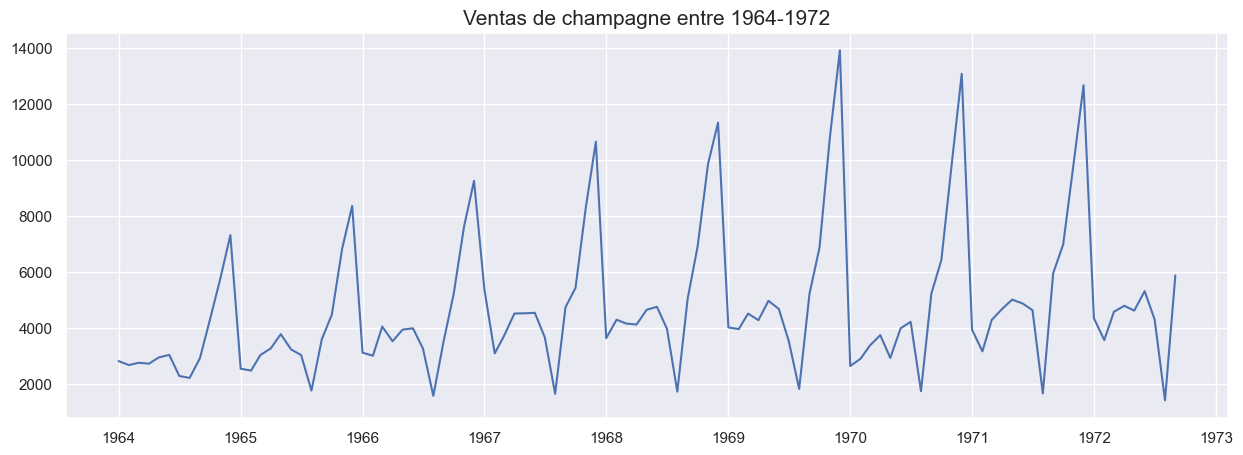

In [10]:
plt.figure(figsize=(15,5))
plt.title('Ventas de champagne entre 1964-1972', fontsize = 15)
plt.plot(df)
plt.show()

In [11]:
### Verificamos la estacionariedad

from statsmodels.tsa.stattools import adfuller # Importamos el test de Dickey-Fuller

test_result = adfuller(df['Sales']) # Aplicamos el test de Dickey-Fuller para verificar la estacionariedad de la serie

In [12]:
#H0: No es estacionaria
#H1: Es estacionaria

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print('El valor de p es menor a 0.05, lo que significa que podemos recharzar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.')
    else:
        print('Evidencia débil contra la hipótesis nula, lo cual significa que la serie de tiempo tiene una raíz unitaria que indica que no es estacionaria.')

In [13]:
adfuller_test(df['Sales']) # Aplicamos la función para verificar la estacionariedad de la serie

ADF Test Statistic : -1.8335930563276184
p-value : 0.36391577166024713
#Lags Used : 11
Number of Observations Used : 93
Evidencia débil contra la hipótesis nula, lo cual significa que la serie de tiempo tiene una raíz unitaria que indica que no es estacionaria.


### `Diferenciación`

La diferenciación ($\Delta^n$) ayuda a eliminar los cambios de los datos y hace que sean estacionarios.

In [14]:
df['Sales'],df['Sales'].shift(1) # Hacemos un shift de 1

(Month
 1964-01-01    2815.0
 1964-02-01    2672.0
 1964-03-01    2755.0
 1964-04-01    2721.0
 1964-05-01    2946.0
                ...  
 1972-05-01    4618.0
 1972-06-01    5312.0
 1972-07-01    4298.0
 1972-08-01    1413.0
 1972-09-01    5877.0
 Name: Sales, Length: 105, dtype: float64,
 Month
 1964-01-01       NaN
 1964-02-01    2815.0
 1964-03-01    2672.0
 1964-04-01    2755.0
 1964-05-01    2721.0
                ...  
 1972-05-01    4788.0
 1972-06-01    4618.0
 1972-07-01    5312.0
 1972-08-01    4298.0
 1972-09-01    1413.0
 Name: Sales, Length: 105, dtype: float64)

In [53]:
2672-2815

-143

In [54]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1) # Diferencia de primer orden

# 1 1 
# 2 2 
# 3 3

# 1
# 2 1
# 3 2
# 4 3

In [64]:
df['Sales'].head(3)

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
Name: Sales, dtype: float64

In [63]:
df['Sales'].shift(1).head(3)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
Name: Sales, dtype: float64

In [1]:
2672-2815

-143

In [62]:
df['Sales First Difference'].head() # Observamos que el primer valor es NaN

Month
1964-01-01      NaN
1964-02-01   -143.0
1964-03-01     83.0
1964-04-01    -34.0
1964-05-01    225.0
Name: Sales First Difference, dtype: float64

Tenemos datos mensuales, así que intentemos con un shift de 12.

In [68]:
df['Sales'].shift(12).head(20) # 12 meses

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN
1964-06-01       NaN
1964-07-01       NaN
1964-08-01       NaN
1964-09-01       NaN
1964-10-01       NaN
1964-11-01       NaN
1964-12-01       NaN
1965-01-01    2815.0
1965-02-01    2672.0
1965-03-01    2755.0
1965-04-01    2721.0
1965-05-01    2946.0
1965-06-01    3036.0
1965-07-01    2282.0
1965-08-01    2212.0
Name: Sales, dtype: float64

In [69]:
df['Seasonal First Difference']= df['Sales'] - df['Sales'].shift(12) # Diferencia estacional de 12 meses

In [70]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


Verificamos si nuestros datos ahora son estacionarios.

In [73]:
adfuller_test(df['Seasonal First Difference'].dropna()) # Eliminamos los valores nulos

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
El valor de p es menor a 0.05, lo que significa que podemos recharzar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.


In [74]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.189896448050991
p-value : 2.5196204473871814e-10
#Lags Used : 11
Number of Observations Used : 92
El valor de p es menor a 0.05, lo que significa que podemos recharzar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.


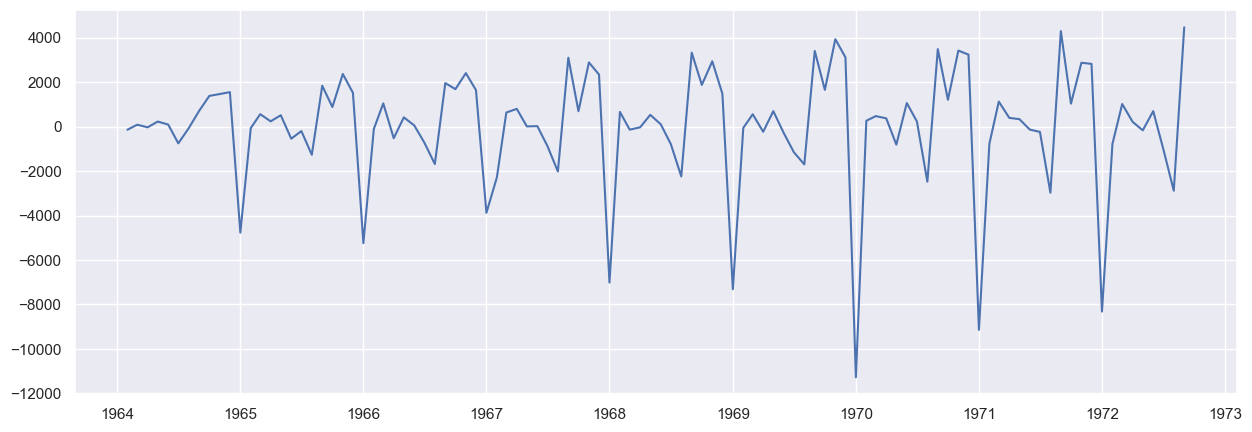

In [75]:
plt.figure(figsize=(15,5))

plt.plot(df['Sales First Difference'])
plt.show()

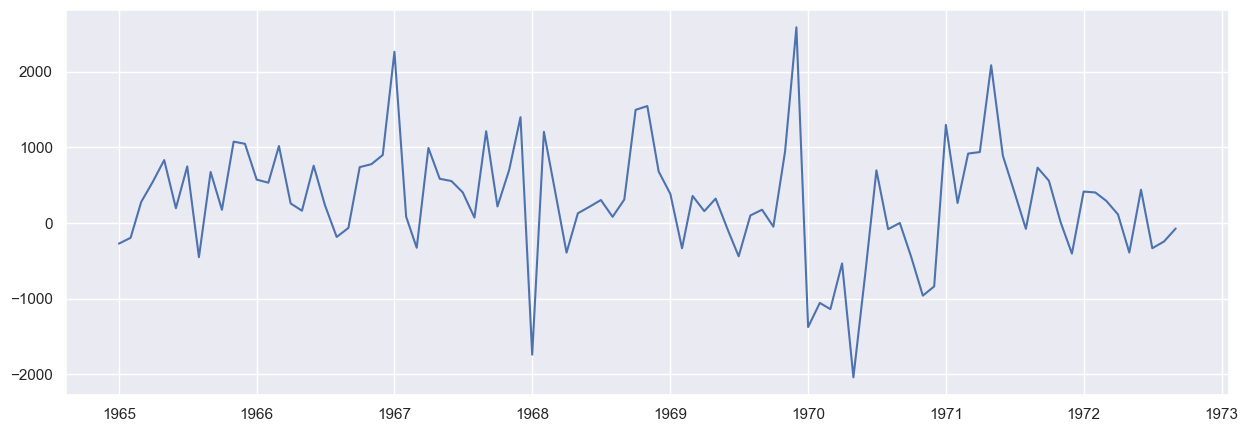

In [22]:
plt.figure(figsize=(15,5))

plt.plot(df['Seasonal First Difference'])
plt.show()

### `Correlograma`

La correlación es una cuantificación de la relación entre dos variables. 



Hasta este momento habíamos visto el concepto de correlación, el cual nos servía para cuantificar la relación entre dos variables. Ahora introduciremos el concepto de autocorrelación. 
La autocorrelación es la correlación de una serie consigo misma. Pero toda variable correlacionada consigo misma da 1, por lo que estaría faltando algo. Lo que falta son los *lags* (ventana temporal).

La autocorrelación se calcula con la serie de tiempo original y la misma serie desfasada o corrida en el tiempo. 

En la librería `statsmodel` esto lo logramos con la función `acf`.

Veremos la función de autocorrelación parcial y la función de autocorrelación . Mientras la primera solo tiene en cuenta el impacto de las variables directas, la segunda tiene en cuenta el impacto de las variables directas e indirectas.

In [23]:
#import sys
#!{sys.executable} -m pip uninstall statsmodels
#!{sys.executable} -m pip install statsmodels
import statsmodels as sm

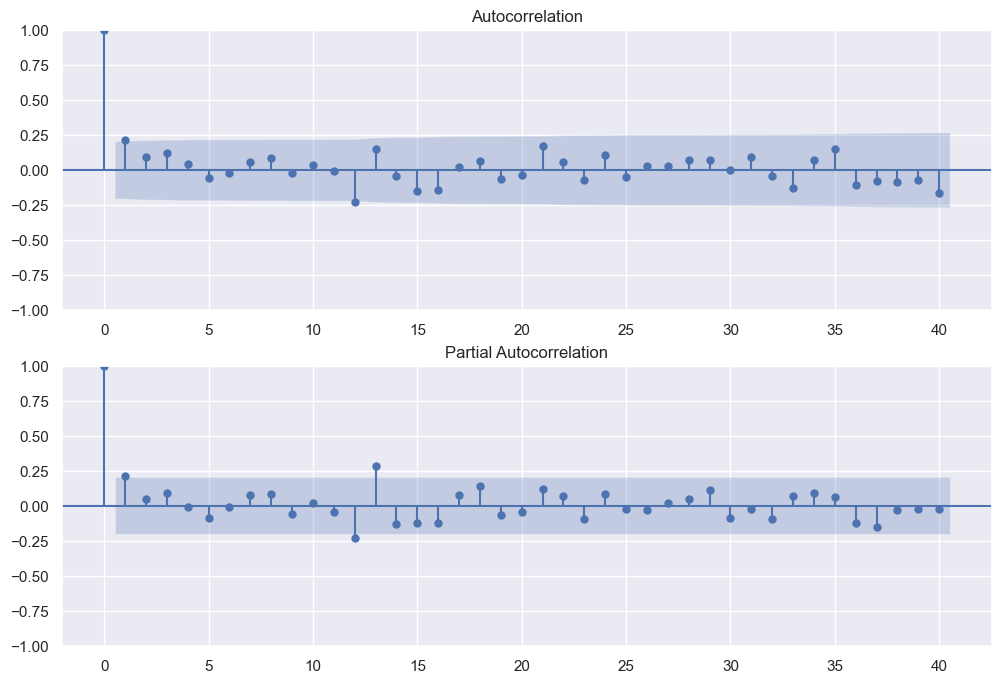

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1) # lag = 40 es 12 meses * 3 + 4, lo que significa que estamos viendo 3 años de datos laggeados + 4 meses
ax2 = fig.add_subplot(212)
fig = tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2) 

- Correlación y Retraso:

En el eje horizontal de la gráfica, tienes los retrasos (lags), que representan los intervalos de tiempo entre los valores actuales y los valores pasados.
En el eje vertical, tienes los coeficientes de correlación, que varían de -1 a 1. Un coeficiente de 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta, y 0 indica ausencia de correlación.

- Significancia de las Correlaciones:

Los picos en la gráfica indican correlaciones significativas entre la serie y sus retrasos correspondientes. Si un pico se encuentra fuera de las bandas de confianza (límites de confianza), es más probable que la correlación sea significativa.
Las bandas de confianza son áreas sombreadas alrededor de cero que indican los límites en los que se esperan valores aleatorios de correlación.


- Patrones en la Gráfica:

Un decaimiento gradual de los valores de autocorrelación sugiere una serie temporal con una tendencia o patrón. Puedes observar cómo la correlación disminuye a medida que aumenta el retraso.
Picos en intervalos regulares podrían indicar una componente estacional en la serie temporal.

- Identificación de Patrones:

La gráfica de autocorrelación puede ayudar a identificar posibles modelos AR (autoregresivos) o MA (media móvil) para el análisis de la serie temporal.
En un modelo AR, las autocorrelaciones decayen lentamente.
En un modelo MA, las autocorrelaciones pueden ser significativas solo en los primeros retrasos.

- Ruido y Fluctuaciones:

Si los valores de autocorrelación son pequeños y están dentro de las bandas de confianza, es posible que la serie contenga mucho ruido o fluctuaciones aleatorias.




## **Interpretación de los gráficos de autocorrelación y autocorrelación parcial**
Uutocorrelograma (ACF) y un correlograma parcial (PACF) para la serie de tiempo Seasonal First Difference, a partir del valor 13.

- El ACF muestra la autocorrelación de la serie de tiempo en diferentes rezagos. La autocorrelación es una medida de la similitud entre los valores de la serie de tiempo en diferentes puntos en el tiempo.

- El PACF muestra la autocorrelación parcial de la serie de tiempo en diferentes rezagos. La autocorrelación parcial es una medida de la similitud entre los valores de la serie de tiempo en diferentes puntos en el tiempo, controlando por los valores anteriores de la serie de tiempo.


Estos gráficos se pueden utilizar para identificar patrones en la serie de tiempo y para determinar el orden de un modelo ARIMA o SARIMAX.

Cómo interpretar el ACF y el PACF

Para interpretar el ACF y el PACF, se debe observar los valores de correlación y los rezagos en los que estos valores son significativos.

- Un valor de correlación alto indica una fuerte correlación entre los valores de la serie de tiempo en diferentes puntos en el tiempo.
- Un valor de correlación bajo indica una correlación débil o inexistente entre los valores de la serie de tiempo en diferentes puntos en el tiempo.
- Un rezago significativo es un rezago en el que el valor de correlación es estadísticamente significativo.
- Si el ACF muestra una autocorrelación significativa en los primeros rezagos, esto indica que la serie de tiempo tiene una tendencia. Si el ACF muestra una autocorrelación significativa en los rezagos estacionales, esto indica que la serie de tiempo tiene una estacionalidad.

Si el PACF muestra una autocorrelación parcial significativa en los primeros rezagos, esto indica que la serie de tiempo tiene un término autorregresivo (AR) de ese orden. Si el PACF muestra una autocorrelación parcial significativa en los rezagos estacionales, esto indica que la serie de tiempo tiene un término autorregresivo estacional (SAR) de ese orden.

Ejemplo

Supongamos que el ACF de la serie de tiempo Seasonal First Difference muestra una autocorrelación significativa en los primeros dos rezagos y en los rezagos estacionales 4, 8, 12 y 16. El PACF muestra una autocorrelación parcial significativa en los primeros dos rezagos y en los rezagos estacionales 4 y 8.

Esto indica que la serie de tiempo tiene una tendencia, una estacionalidad de 12 períodos y un modelo ARIMA(2,0,0)(2,1,1)12.

*Cada pico (retraso) que está por encima del área punteada se considera estadísticamente significativo.*

$\Delta y_t = \psi_1y_{t-1} + \delta_1e_{t-1} + e_t$

In [26]:
from statsmodels.tsa.arima.model import ARIMA

- Para datos no estacionales

- En parámetro order debemos especificar p, d y q
- p: orden del modelo AR (autoregresivo) 
- d: orden de integración (número de diferencias no estacionales)
- q: orden del modelo MA (media móvil) 


Un modelo ARIMA(1,1,1) tiene un término autorregresivo de orden 1, un término de media móvil de orden 1 y un orden de diferenciación de 1. Esto significa que el modelo:

**- Depende del valor anterior de la serie de tiempo.**

**- Depende del error de predicción anterior.**

**- Ha sido diferenciado una vez para eliminar la tendencia.**

In [89]:
model = ARIMA(df['Sales'],order=(2,1,15)) # \Delta y_t = \psi_1y_{t-1} + \delta_1e_{t-1} + e_t

model_fit=model.fit() # Ajustamos el modelo

c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\stats

In [90]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                ARIMA(2, 1, 15)   Log Likelihood                -941.578
Date:                Fri, 13 Oct 2023   AIC                           1919.155
Time:                        17:30:29   BIC                           1966.754
Sample:                    01-01-1964   HQIC                          1938.439
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5111     13.176     -0.039      0.969     -26.335      25.313
ar.L2          0.1108      3.628      0.031      0.976      -7.000       7.222
ma.L1          0.0772     13.434      0.006      0.995     -26.253      26.407
ma.L2         -0.7652      4.984     -0.154      0.878     -10.533       9.003
ma.L3         -0.1700      7.069     -0.024      0.981     -14.026      13.685
ma.L4         -0.1932      1.341     -0.144      0.885      -2.822       2.436
ma.L5         -0.0060      3.167     -0.002      0.999      -6.212       6.200
ma.L6          0.1373      1.554      0.088      0.930      -2.909       3.184
ma.L7          0.0881      1.413      0.062      0.950      -2.681       2.857
ma.L8         -0.2005      1.521     -0.132      0.895      -3.182       2.781
ma.L9         -0.1172      3.085     -0.038      0.970      -6.165       5.930
ma.L10         0.1148      1.286      0.089      0.929      -2.406       2.635
ma.L11         0.1034      1.400      0.074      0.941      -2.640       2.847
ma.L12         0.5996      1.112      0.539      0.590      -1.580       2.779
ma.L13         0.0806      7.751      0.010      0.992     -15.111      15.273
ma.L14        -0.4385      2.173     -0.202      0.840      -4.697       3.820
ma.L15        -0.1100      4.520     -0.024      0.981      -8.970       8.750
sigma2       8.41e+06   2.07e+06      4.071      0.000    4.36e+06    1.25e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                10.43
Prob(Q):                              0.85   Prob(JB):                         0.01
Heteroskedasticity (H):               2.39   Skew:                            -0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.34e+14. Standard errors may be unstable.
"""

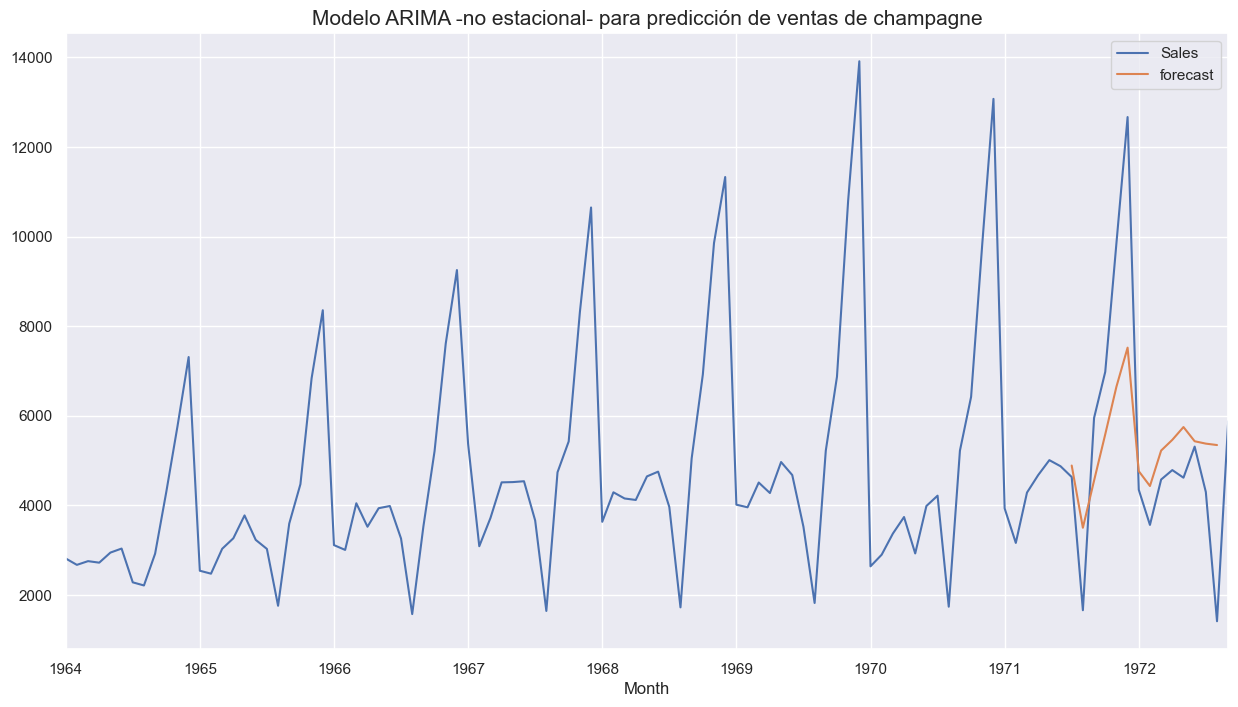

In [91]:
df['forecast']=model_fit.predict(start = 90, end = 103, dynamic = True) # start y end son los índices de las fechas que queremos predecir (en este caso, 1964-1972)
df[['Sales','forecast']].plot(figsize=(15,8)) # Graficamos las ventas reales y las predicciones
plt.title('Modelo ARIMA -no estacional- para predicción de ventas de champagne', fontsize = 15)
plt.show()

No estamos obteniendo buenos resultados usando ARIMA porque nuestros datos tienen un comportamiento estacional, así que intentemos usar ARIMA estacional.


In [30]:
import statsmodels as sm # 

#sarimax es un modelo de regresión lineal con variables exógenas y endógenas 

- En el parámetro seasonal_orden debemos indicar = p estacional, d estacional, q estacional y periodicidad estacional
- En el parámetro order debemos indicar = p, d, q y periodicidad estacional (12 meses) 
- En el parámetro trend debemos indicar = 'n' para que no tenga en cuenta la tendencia 
- En el parámetro seasonal_decompose debemos indicar = 'add' para que tenga en cuenta la estacionalidad
- En el parámetro freq debemos indicar = 'MS' para que tenga en cuenta la periodicidad mensual 


Un modelo SARIMAX(1,1,1)(1,1,1,4) tiene un modelo ARIMA(1,1,1) en el componente de la serie de tiempo y un modelo ARIMA(1,1,1) en el componente estacional. Esto significa que el modelo:

**- Depende del valor anterior de la serie de tiempo.**

**- Depende del error de predicción anterior.**

**- Ha sido diferenciado una vez para eliminar la tendencia.**

**- Tiene una estacionalidad de 4 períodos.**


In [92]:

model=sm.tsa.statespace.sarimax.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) # 12 periodos de estacionalidad (12 meses) 
results=model.fit()

c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [93]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Fri, 13 Oct 2023   AIC                           1486.804
Time:                                    17:32:57   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

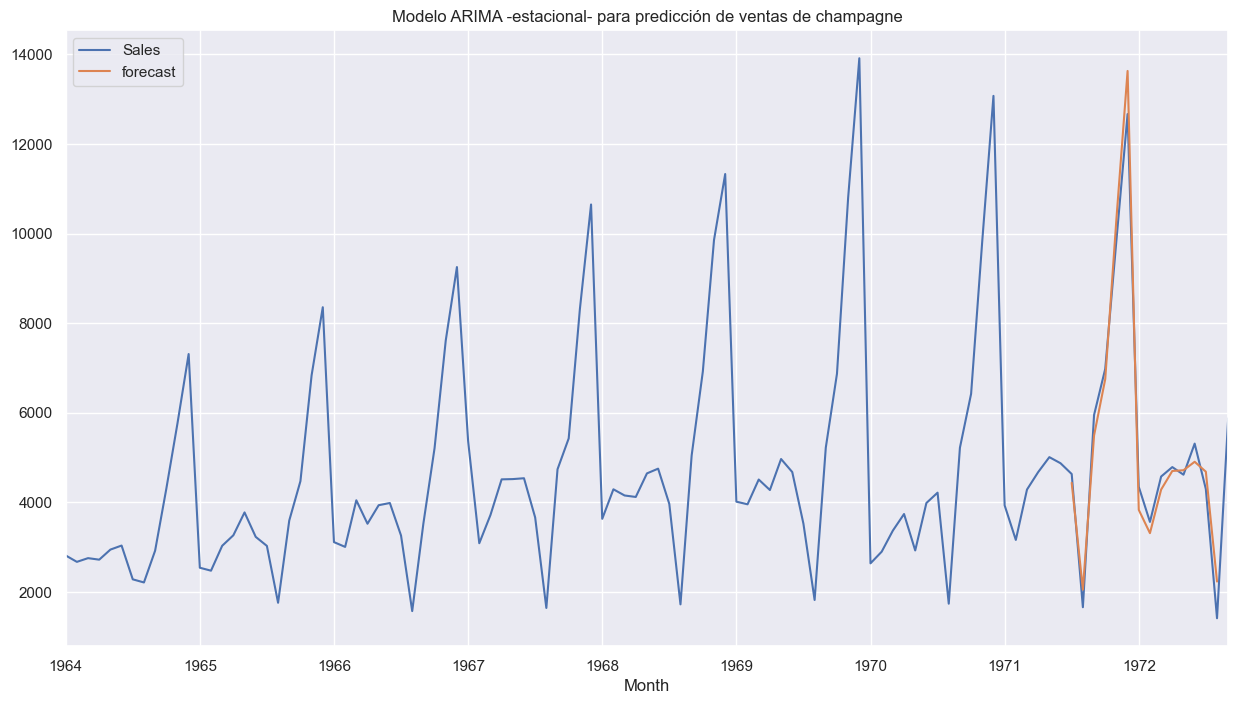

In [94]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(15,8))
plt.title('Modelo ARIMA -estacional- para predicción de ventas de champagne')
plt.show()

*Observamos cómo mejoro SARIMA respecto de ARIMA*.

Realizaremos una predicción de ventas para los próximos 3 años.

In [34]:
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1]+ DateOffset(months=x)for x in range(0,36)] # 3 años = 36 meses

In [35]:
print(future_dates)

[Timestamp('1972-09-01 00:00:00'), Timestamp('1972-10-01 00:00:00'), Timestamp('1972-11-01 00:00:00'), Timestamp('1972-12-01 00:00:00'), Timestamp('1973-01-01 00:00:00'), Timestamp('1973-02-01 00:00:00'), Timestamp('1973-03-01 00:00:00'), Timestamp('1973-04-01 00:00:00'), Timestamp('1973-05-01 00:00:00'), Timestamp('1973-06-01 00:00:00'), Timestamp('1973-07-01 00:00:00'), Timestamp('1973-08-01 00:00:00'), Timestamp('1973-09-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1973-11-01 00:00:00'), Timestamp('1973-12-01 00:00:00'), Timestamp('1974-01-01 00:00:00'), Timestamp('1974-02-01 00:00:00'), Timestamp('1974-03-01 00:00:00'), Timestamp('1974-04-01 00:00:00'), Timestamp('1974-05-01 00:00:00'), Timestamp('1974-06-01 00:00:00'), Timestamp('1974-07-01 00:00:00'), Timestamp('1974-08-01 00:00:00'), Timestamp('1974-09-01 00:00:00'), Timestamp('1974-10-01 00:00:00'), Timestamp('1974-11-01 00:00:00'), Timestamp('1974-12-01 00:00:00'), Timestamp('1975-01-01 00:00:00'), Timestamp('19

In [36]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df.columns) # Creamos un dataframe con las fechas futuras y las columnas del dataframe original (df)

In [37]:
print(future_datest_df)

           Sales Sales First Difference Seasonal First Difference forecast
1972-10-01   NaN                    NaN                       NaN      NaN
1972-11-01   NaN                    NaN                       NaN      NaN
1972-12-01   NaN                    NaN                       NaN      NaN
1973-01-01   NaN                    NaN                       NaN      NaN
1973-02-01   NaN                    NaN                       NaN      NaN
1973-03-01   NaN                    NaN                       NaN      NaN
1973-04-01   NaN                    NaN                       NaN      NaN
1973-05-01   NaN                    NaN                       NaN      NaN
1973-06-01   NaN                    NaN                       NaN      NaN
1973-07-01   NaN                    NaN                       NaN      NaN
1973-08-01   NaN                    NaN                       NaN      NaN
1973-09-01   NaN                    NaN                       NaN      NaN
1973-10-01   NaN         

In [38]:
future_df = pd.concat([df,future_datest_df]) # Concatenamos los dos dataframes (df y future_df)

In [39]:
future_df

,Sales,Sales First Difference,Seasonal First Difference,forecast
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
...,...,...,...,...
1975-04-01,NaN,NaN,NaN,NaN
1975-05-01,NaN,NaN,NaN,NaN
1975-06-01,NaN,NaN,NaN,NaN
1975-07-01,NaN,NaN,NaN,NaN


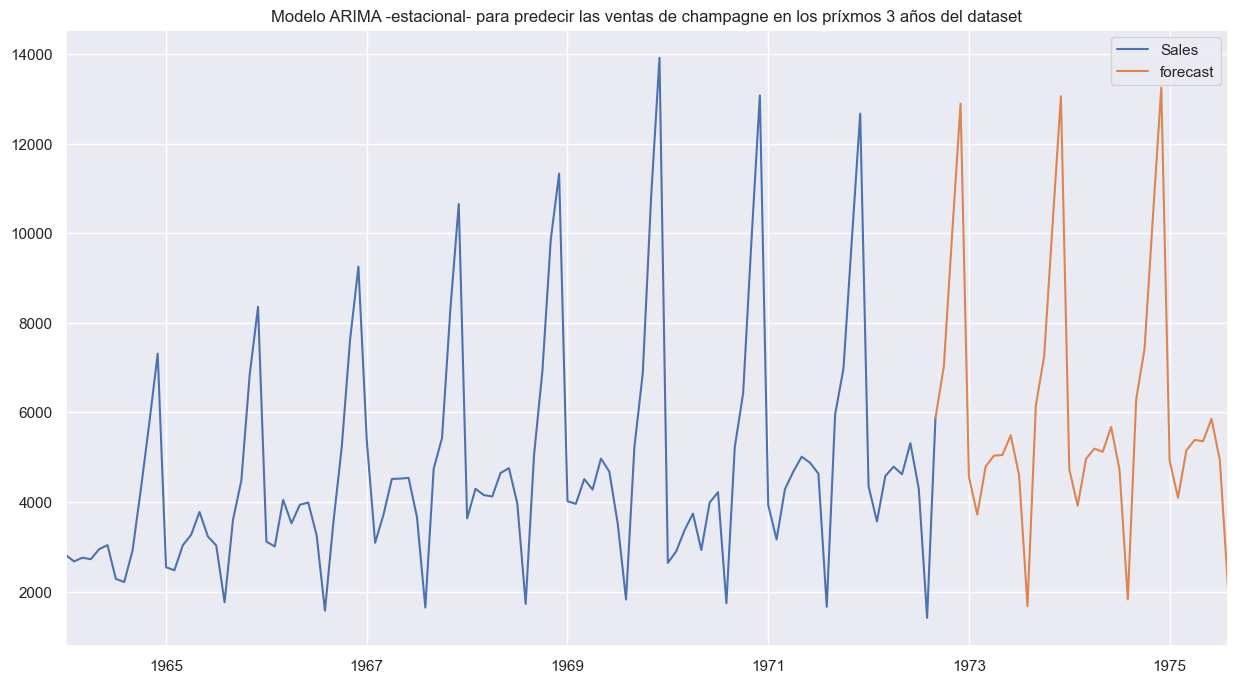

In [95]:
future_df['forecast'] = results.predict(start = 104, end = 140, dynamic= True)   # 104 = 1972-12-01, 140 = 1975-11-01
future_df[['Sales', 'forecast']].plot(figsize=(15, 8)) 
plt.title('Modelo ARIMA -estacional- para predecir las ventas de champagne en los príxmos 3 años del dataset')
plt.show()